#### Supervised Learning

Machine Learning with labelled data

#### Types of Supervised Learning problems

- Classification : label is a category/class

e.g predicting whether an email is spam/not spam

- Regression : label is a continuous numerical value

e.g predicting how much dollar would sell for

- Time series : problems that change with time and the input is a date

e.g forecasting : predicting price of stocks

#### Classification

#### Problem Statement
A health facility has been experiencing a lot of death due to cancer with a few survivors. They’ve recently been told on how AI can be used to predict whether a cancer case is benign or malignant on the fly without having the patient go through rigorous/expensive procedures
They now seek your expertise as a Data Scientist and have provided you with a dataset with the link below:

In [2]:
# CRISP-DM framework

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [9]:
df = pd.read_csv('cancer dataset.csv', sep=';')

In [10]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


#### Data Understanding / Profiling
The data provided represent the different properties of a cell and the corresponding class - benign or malignant

In [11]:
df.shape

(300, 10)

In [12]:
df.columns

Index(['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
       'bchromatin', 'normnucl', 'mitoses', 'classe'],
      dtype='object')

### Data Dictionary
| Column Name | Description | Data Type |
|:------------|:------------|:----------|
| **clump** | Clump thickness; how thick the cell clumps are | Integer |
| **ucellsize** | Uniformity of cell size; consistency of sizes across cells | Integer |
| **ucellshape** | Uniformity of cell shape; consistency of shapes across cells | Integer |
| **mgadhesion** | Marginal adhesion; how strongly cells stick together at the edges | Integer |
| **sepics** | Single epithelial cell size; size of individual epithelial cells | Integer |
| **bnuclei** | Bare nuclei; presence of nuclei that are not surrounded by cytoplasm | Integer |
| **bchromatin** | Bland chromatin; texture of the chromatin inside the cell nuclei | Integer |
| **normnucl** | Normal nucleoli; appearance of nucleoli (small structures inside the nucleus) | Integer |
| **mitoses** | Mitoses; number of cells undergoing mitosis (cell division) | Integer |
| **classe** | Class label (e.g., benign,malignant) | Object |

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


columns can be grouped into features (inputs) and labels (output)

There is usually 1 output - classe
The rest of the columns are features/inputs

#### Data Preparation

In [14]:
## data cleaning

df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [15]:
# Class inbalance

df['classe'].value_counts()

classe
begnin       199
malignant    101
Name: count, dtype: int64

Dealing with class imbalance

- Oversampling - for the minority classe
- Undersampling - for the majority classe

In [20]:
df['classe'] = df['classe'].replace({
    'begnin' : 0,
    'malignant' : 1
})

C:\Users\HP\AppData\Local\Temp\ipykernel_13376\321778777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classe'] = df['classe'].replace({


In [22]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,0
1,1,5,8,6,5,8,7,10,1,1
2,3,2,2,3,2,1,1,1,1,0
3,3,1,1,3,8,1,5,8,1,0
4,10,4,6,1,2,10,5,3,1,1


In [23]:
x = df.drop('classe', axis=1)
y = df.classe

In [24]:
x

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
0,4,1,1,1,2,3,1,1,1
1,1,5,8,6,5,8,7,10,1
2,3,2,2,3,2,1,1,1,1
3,3,1,1,3,8,1,5,8,1
4,10,4,6,1,2,10,5,3,1
...,...,...,...,...,...,...,...,...,...
295,4,1,1,1,2,1,3,1,1
296,5,1,1,4,2,1,3,1,1
297,5,1,1,1,2,1,2,1,1
298,5,7,9,8,6,10,8,10,1


In [25]:
y

0      0
1      1
2      0
3      0
4      1
      ..
295    0
296    0
297    0
298    1
299    0
Name: classe, Length: 300, dtype: int64

#### Model Building

In [28]:
# split the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

#### Algorithms used for classification

- Logistic Regression
- Decision Tree
- KNN (K-Nearest Neighbour)
- Random Forest (Boosting)

In [29]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression uses probability

model = LogisticRegression()

In [30]:
# this is where the training occurs

model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [31]:
#to build a model, import evaluation metrics

from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(x_test)

In [32]:
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [34]:
print(f'Accuracy score : {accuracy_score(y_test,predictions)}')

Accuracy score : 0.9333333333333333


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.86      0.95      0.90        20

    accuracy                           0.93        60
   macro avg       0.92      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



In [41]:
#confusion matrix

conf_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(conf_matrix, annot=True)

<Axes: xlabel='Predicted', ylabel='Actual'>

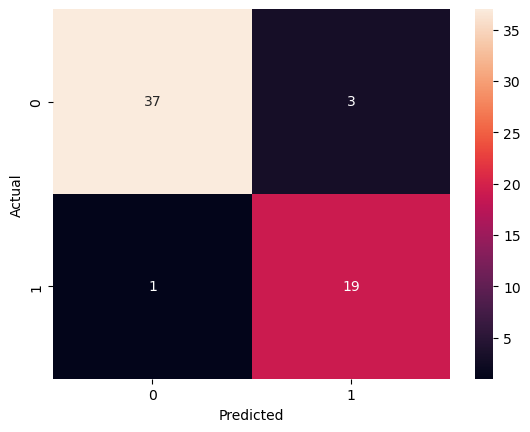

In [42]:
plt.show()

In [43]:
# Feature selection